In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
X = data.data
print(data.feature_names)
Y = data.target
print(Y)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0

In [4]:
X.shape

(569, 30)

In [5]:
# 1 paso: Crear un DataFrame con los datos
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
# 2 paso: Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [7]:
# 3 paso: Crear el modelo de regresión logística y entrenarlo
model = LogisticRegression(max_iter=200, solver='liblinear')
model.fit(X_train, Y_train)

LogisticRegression(max_iter=200, solver='liblinear')

In [8]:
# 4 paso: Hacer predicciones
Y_pred = model.predict(X_test)

In [9]:
# 5 paso: Evaluar el modelo
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy}')
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix:')
print(confusion_matrix)
classification_report = metrics.classification_report(Y_test, Y_pred)
print('Classification Report:')
print(classification_report)

Accuracy: 0.956140350877193
Confusion Matrix:
[[39  4]
 [ 1 70]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### Umbral Cutoff

In [15]:
cutoff = 0.7 # Establecer un punto de corte, en este caso 0.7. Si la probabilidad es mayor a 0.7, se clasifica como 1, de lo contrario como 0.
y_pred_test_prob = model.predict_proba(X_test)[:, 1] # Proabilidades de la clase positiva (1)
y_pred_test_cutoff = (y_pred_test_prob > cutoff).astype(int) # Aplicar el punto de corte, haciendo la predicción final mediante una clasificación binaria
confusion_matrix_cutoff = metrics.confusion_matrix(Y_test, y_pred_test_cutoff)
print(f'Confusion Matrix with cutoff {cutoff}:')
print(confusion_matrix_cutoff)

Confusion Matrix with cutoff 0.7:
[[42  1]
 [ 1 70]]


### Curva ROC

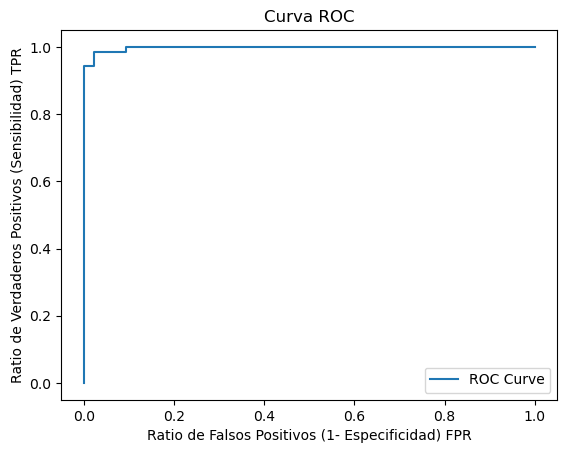

In [16]:
FPR, TPR, cutoffs = metrics.roc_curve(Y_test, y_pred_test_prob) # Usar las probabilidades para calcular la curva ROC
plt.plot(FPR, TPR, label='ROC Curve')
plt.xlabel('Ratio de Falsos Positivos (1- Especificidad) FPR')
plt.ylabel('Ratio de Verdaderos Positivos (Sensibilidad) TPR')
plt.title('Curva ROC')
plt.legend()
plt.show()